## OCR_심화

### TrOCR 모델

In [6]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 36.7 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 17.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [torch]32m4/5 [torch]]x]
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install transformers 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 33.5 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 20.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [transformers] [transformers]ub]
Note: you may need to restart the kernel to use updated packages.


TrOCR 모델 데모 start!
TrOCR 모델 로딩 중 : microsoft/trocr-base-printed


Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 10082.46it/s]
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


모델 로딩 완료(Device:cpu)
인식된 텍스트: ['THANKMM']

2. 여러 모델 비교
모델 사용 중: Base printed


Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 14873.42it/s]
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


모델 사용 중: Base handwritten


Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 6186.29it/s]
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


모델 사용 중: Large printed


Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 9341.43it/s]
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Base printed        : ['THANKMM']
Base handwritten    : ['6th.th.']
Large printed       : ['***']

3. 신뢰도 점수 테스트
신뢰도 계산 상세:
토큰 확률: ['0.184', '0.542', '0.617', '0.697']
평균 신뢰도: 0.510
인식된 텍스트: ['THANKMM']
신뢰도 점수: 51.0%

4. 성능 평가 테스트
원본: 'Hello world!'
예측: 'HELBWATAL (RM)'
정확도: 35.7%

원본: 'The quick brown fox jumps over the lazy dog.'
예측: 'RECEIPTARYS FOR EXCLUDED ON BACK'
정확도: 66.7%

원본: 'Machine learning is fascinating.'
예측: 'INCHANGE@MANITY ONCLUSIVE OF RECEIPT FOR RECEIPT FOR'
정확도: 65.0%

원본: '2024 한국어 테스트'
예측: '2024MM'
정확도: 30.0%

원본: 'Mixed 언어 테스트 123!'
예측: 'MASITIM: 123- 1 VEGET (RM)'
정확도: 25.0%


전체 평균 정확도: 44.48%


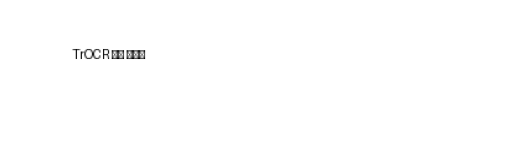

In [4]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image, ImageDraw, ImageFont
import requests
import torch
import numpy as np
import matplotlib.pyplot as plt

class TrOCRsystem:
    def __init__(self, model_name='microsoft/trocr-base-printed'):
        print(f"TrOCR 모델 로딩 중 : {model_name}")
        self.processor = TrOCRProcessor.from_pretrained(model_name)
        self.model = VisionEncoderDecoderModel.from_pretrained(model_name)
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model.to(self.device)
        print(f"모델 로딩 완료(Device:{self.device})")
        
    def extract_image(self, image, return_confidence=False):
        # PIL 이미지로 변환
        if isinstance(image, np.ndarray):
            image = Image.fromarray(image)
        elif isinstance(image, str):
            if image.startswith(('http://', 'https://')):
                image = Image.open(requests.get(image, stream=True).raw)
            else: 
                image = Image.open(image)
        
        pixel_values = self.processor(images=image, return_tensors="pt").pixel_values
        pixel_values = pixel_values.to(self.device)
        
        with torch.no_grad():
            if return_confidence:
                outputs = self.model.generate(
                    pixel_values,
                    return_dict_in_generate=True,
                    output_scores=True,
                    max_length=256
                )
                generated_ids = outputs.sequences
                token_scores = outputs.scores
                generated_text = self.processor.batch_decode(generated_ids, skip_special_tokens=True)
            else:
                generated_ids = self.model.generate(pixel_values)
                generated_text = self.processor.batch_decode(generated_ids, skip_special_tokens=True)
            
        if return_confidence:
            if token_scores:
                token_probs = []
                for score in token_scores:
                    probs = torch.softmax(score, dim=-1)
                    max_prob = torch.max(probs).item()
                    token_probs.append(max_prob)
                confidence = sum(token_probs) / len(token_probs) if token_probs else 0.0
                print("신뢰도 계산 상세:")
                print(f"토큰 확률: {[f'{p:.3f}' for p in token_probs]}")
                print(f"평균 신뢰도: {confidence:.3f}")
            else:
                confidence = 0.5
                print("실제 확률 정보 없음, 기본값 사용")
            return generated_text, confidence
            
        return generated_text
    
    def batch_extract(self, images):
        results = []
        for i, image in enumerate(images):
            print(f"처리중 : {i+1}/{len(images)}")
            try:
                text = self.extract_image(image)
                results.append(text)
            except Exception as e:
                print(f"이미지 {i+1} 처리 중 오류 발생: {e}")
                results.append("")
        return results
    
    def compare_models(self, image):
        models = {
            'Base printed': 'microsoft/trocr-base-printed',
            'Base handwritten': 'microsoft/trocr-base-handwritten',
            'Large printed': 'microsoft/trocr-large-printed'
        }
        results = {}
        for model_name, model_path in models.items():
            try:
                print(f"모델 사용 중: {model_name}")
                temp_processor = TrOCRProcessor.from_pretrained(model_path)
                temp_model = VisionEncoderDecoderModel.from_pretrained(model_path)
                temp_model.to(self.device)
                pixel_values = temp_processor(images=image, return_tensors="pt").pixel_values.to(self.device)
                with torch.no_grad():
                    generated_ids = temp_model.generate(pixel_values)
                text = temp_processor.batch_decode(generated_ids, skip_special_tokens=True)
                results[model_name] = text
                del temp_model, temp_processor
                torch.cuda.empty_cache() if torch.cuda.is_available() else None
            except Exception as e:
                print(f"모델 {model_name} 처리 중 오류 발생: {e}")
                results[model_name] = f"Error: {str(e)}"
        return results

# 전역 함수 정의

def create_sample_trocr_image(handwritten=False):
    img = Image.new('RGB', (400,100), 'white')
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("arial.ttf", 24)
    except IOError:
        font = ImageFont.load_default()
    text = "TrOCR 모델 테스트" if not handwritten else "손글씨 테스트"
    draw.text((50, 30), text, font=font, fill='black')
    img.save("sample_trocr_image.png")
    return img

def create_test_image(text):
    img_width = len(text) * 20 + 100
    img_height = 60
    img = Image.new('RGB', (img_width, img_height), 'white')
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("arial.ttf", 24)
    except OSError:
        font = ImageFont.load_default()
    draw.text((20,20), text, font=font, fill='black')
    return img

def calculate_simple_accuracy(ground_truth, predicted):
    if not ground_truth or not predicted:
        return 0.0
    gt_chars = set(ground_truth.lower().replace(" ", ""))
    pred_chars = set(predicted.lower().replace(" ", ""))
    if len(gt_chars) == 0:
        return 1.0 if len(pred_chars) == 0 else 0.0
    intersection = len(gt_chars.intersection(pred_chars))
    union = len(gt_chars.union(pred_chars))
    return intersection / union if union > 0 else 0.0

if __name__ == "__main__":
    # 데모 실행
    print("TrOCR 모델 데모 start!")
    ocr = TrOCRsystem()

    # 1. 로컬 이미지 생성 후 테스트
    sample_image = create_sample_trocr_image()
    text = ocr.extract_image(sample_image)
    print(f"인식된 텍스트: {text}")

    # 2. 여러 모델 결과 비교
    print("\n2. 여러 모델 비교")
    comparison = ocr.compare_models(sample_image)
    for model_name, result in comparison.items():
        print(f"{model_name:20}: {result}")

    # 3. 신뢰도 점수 테스트
    print("\n3. 신뢰도 점수 테스트")
    text, confidence = ocr.extract_image(sample_image, return_confidence=True)
    print(f"인식된 텍스트: {text}")
    print(f"신뢰도 점수: {confidence:.1%}")

    # 4. 성능 평가용 테스트 케이스
    print("\n4. 성능 평가 테스트")
    test_cases = [
        "Hello world!",
        "The quick brown fox jumps over the lazy dog.",
        "Machine learning is fascinating.",
        "2024 한국어 테스트",
        "Mixed 언어 테스트 123!"
    ]
    accuracies = []
    for test_text in test_cases:
        test_image = create_test_image(test_text)
        predicted = ocr.extract_image(test_image)
        
        # predicted가 리스트면 첫 원소 사용
        if isinstance(predicted, list):
            predicted = predicted[0] if predicted else ""
        
        accuracy = calculate_simple_accuracy(test_text, predicted)
        accuracies.append(accuracy)
        
        print(f"원본: '{test_text}'\n예측: '{predicted}'\n정확도: {accuracy:.1%}\n")
    avg_accuracy = sum(accuracies) / len(accuracies) if accuracies else 0.0
    print(f"\n전체 평균 정확도: {avg_accuracy:.2%}")

    # 이미지 예시 시각화
    plt.imshow(sample_image)
    plt.axis('off')
    plt.show()
